In [1]:
import numpy as np
import pandas as pd
import csv
import os
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
import matplotlib as mpl

In [2]:
regimes_dict = {0 : '$630$$\u00b0C$, $35$$\%$ $N_{2}O$',
                1 : '$615$$\u00b0C$, $35$$\%$ $N_{2}O$',
                2 : '$600$$\u00b0C$, $30$$\%$ $N_{2}O$',
                3 : '$550$$\u00b0C$, $25$$\%$ $N_{2}O$',
                4 : '$Pristine$'}

regime_colors = [np.array([255, 214, 2])/255,
                 np.array([251, 179, 0])/255,
                 np.array([251, 126, 0])/255,
                 np.array([255, 42, 6])/255,
                 np.array([27, 22, 140])/255]
regime_colors[:4] = regime_colors[:4][::-1]

In [ ]:
df = pd.read_excel(r'UV vis optimal point ferrocene spark.xlsx', sheet_name = 'spark optimal 770 10%')

In [ ]:
df2 = pd.read_excel(r'normalized RvsT for article data.xlsx', sheet_name = 'Sheet1')

In [ ]:
df2

# ТКС

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(df2.iloc[:, 0].dropna()[:-1], savgol_filter(df2.iloc[:, 1].dropna(), polyorder = 2, window_length = 11), color = regime_colors[-1], label = regimes_dict[4])
ax.plot(df2.iloc[:, 2], df2.iloc[:, 3], color = np.array([141,2,33])/255, label = regimes_dict[2] + '$,$' + '$6$ $s$')
ax.set_ylabel('$R/R_{0}$ $(T$$=$$27$$\u00b0C)$', fontsize = 14)
ax.tick_params(labelsize = 12)
# ax.set_ylim(bottom = 0, top = 1.07)
ax.set_xlim(left = -185, right = 105)
ax.set_xticks(np.arange(-180, 120, 40))
ax.set_xlabel('$T,$ $\u00b0C$', fontsize = 14)
ax.legend(fontsize = 14)
fig.savefig('tks1.png', bbox_inches = 'tight', dpi = 600)

# UV-Vis code

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(df.iloc[:, 0], df.iloc[:, 1]+0.05, color = regime_colors[-1], label = regimes_dict[4])
ax.plot(df.iloc[:, 0], df.iloc[:, 2], color = np.array([141,2,33])/255, label = '$700$$\u00b0C$, $10$$\%$ $N_{2}O$' + '$,$' + '$6$ $s$')
ax.set_ylabel('$Normalized$ $absorbance$$,$ $(a.u.)$', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_ylim(bottom = 0, top = 1.07)
ax.set_xlim(left = 220, right = 2700)
ax.set_xlabel('$\u03BB$$,$ $nm$', fontsize = 14)
ax.legend(fontsize = 14)
fig.savefig('Article uvvis2.png', bbox_inches = 'tight', dpi = 600)

# DMA

In [47]:
df_700C_small = pd.read_excel(r'DMA.xlsx', sheet_name = '700C N2O mean diameter tot conc')
df_700C_big = pd.read_excel(r'DMA.xlsx', sheet_name = '700C DMA ')
df_750C_small = pd.read_excel(r'DMA.xlsx', sheet_name = '750C mean diam tot conc')
df_750C_big = pd.read_excel(r'DMA.xlsx', sheet_name = '750 DMA')

In [ ]:
df_750C_small.iloc[1:]

In [ ]:
df_750C_small

In [4]:
dma_list_700 = ['$0\%$ $N_{2}O$',
                '$10\%$ $N_{2}O$',
                '$20\%$ $N_{2}O$',
                '$30\%$ $N_{2}O$',
                '$40\%$ $N_{2}O$',
                '$50\%$ $N_{2}O$',
                '$60\%$ $N_{2}O$',
                '$70\%$ $N_{2}O$']

dma_list_750 = ['$0\%$ $N_{2}O$',
                '$5\%$ $N_{2}O$',
                '$10\%$ $N_{2}O$',
                '$20\%$ $N_{2}O$',
                '$30\%$ $N_{2}O$',
                '$40\%$ $N_{2}O$',
                '$50\%$ $N_{2}O$',
                '$60\%$ $N_{2}O$']

In [43]:
df_750C_small.dtypes

N2O concentration      object
Mean Diameter          object
Total concentration    object
dtype: object

In [ ]:
np.log10(df_750C_small.iloc[1:, 2].to_numpy().astype(int))

In [ ]:
df_750C_small.iloc[1:, 2].to_numpy()

In [36]:
ax[0,1].yaxis.tick_right()

In [ ]:
ax[0,1].yaxis.tick_right

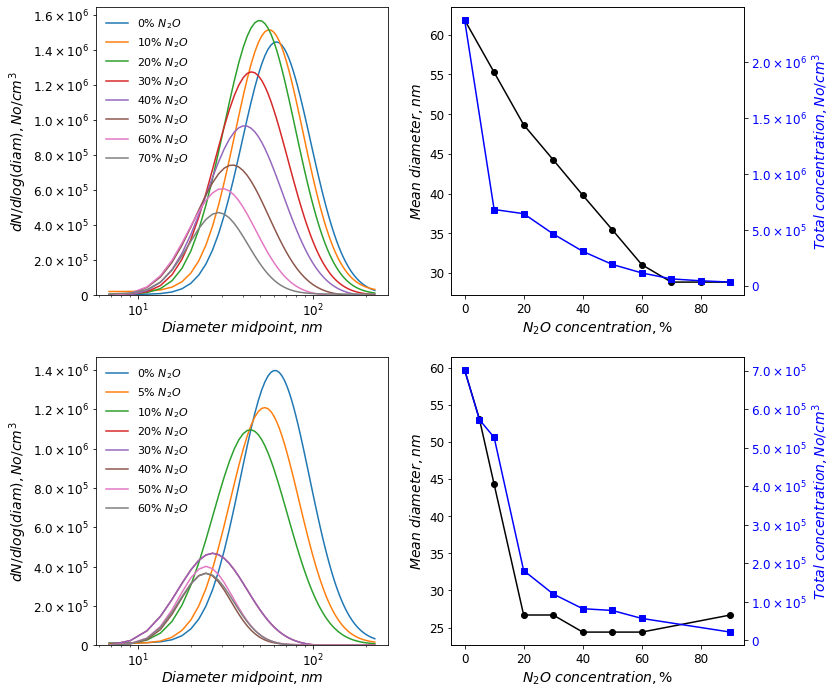

In [97]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))

def fmt(x,pos):
    x = abs(x)
    if x == 0: return "$0$"
#     print(x)

    exponent = int(np.log10(x))
    coeff = x/10**exponent

    return r"${:2.1f} \times 10^{{ {:2d} }}$".format(coeff,exponent)

for i in range(1, 9):
    ax[0,0].plot(df_700C_big.iloc[2:, 0], df_700C_big.iloc[2:, i], label = dma_list_700[i-1])
    ax[1,0].plot(df_750C_big.iloc[2:, 0], df_750C_big.iloc[2:, i], label = dma_list_750[i-1])

ax[0,0].set_xscale('log')
# ax[0,0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
ax[0,0].set_ylim(bottom = 0)
ax[0,0].tick_params(axis='both', which='major', labelsize = 12)
ax[0,0].set_xlabel('$Diameter$ $midpoint,nm$', fontsize = 14)
ax[0,0].set_ylabel('$dN/dlog(diam),No/cm^{3}$', fontsize = 14)
ax[0,0].legend(fontsize = 11, frameon = False)
ax[0,0].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax[0,0].xaxis.labelpad = 0

ax[1,0].set_xscale('log')
# ax[1,0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
ax[1,0].set_ylim(bottom = 0)
ax[1,0].tick_params(axis='both', which='major', labelsize = 12)
ax[1,0].set_xlabel('$Diameter$ $midpoint,nm$', fontsize = 14)
ax[1,0].set_ylabel('$dN/dlog(diam),No/cm^{3}$', fontsize = 14)
ax[1,0].legend(fontsize = 11, frameon = False)
ax[1,0].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax[1,0].xaxis.labelpad = 0

# fmt = lambda x, pos: '{:.1f}e6'.format(x*1e-6, pos)


ax[0,1].plot(df_700C_small.iloc[:, 0], df_700C_small.iloc[:, 1], marker = 'o', color = 'k')
ax2 = ax[0,1].twinx()
ax2.plot(df_700C_small.iloc[:, 0], df_700C_small.iloc[:, 2], marker = 's', color = 'b')
ax2.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax2.tick_params(axis = 'y', labelcolor = 'b')
ax[0,1].set_xlabel('$N_{2}O$ $concentration, \%$', fontsize = 14)
ax[0,1].set_ylabel('$Mean$ $diameter, nm$', fontsize = 14)
ax2.set_ylabel('$Total$ $concentration,No/cm^{3}$', fontsize = 14, color = 'b')
ax[0,1].tick_params(axis='both', which='major', labelsize = 12)
ax2.tick_params(axis='both', which='major', labelsize = 12)



ax[1,1].plot(df_750C_small.iloc[:, 0], df_750C_small.iloc[:, 1], marker = 'o', color = 'k')
ax3 = ax[1,1].twinx()
ax3.plot(df_750C_small.iloc[:, 0], df_750C_small.iloc[:, 2].astype(int), marker = 's', color = 'b')
ax3.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax3.tick_params(axis = 'y', labelcolor = 'b')
ax[1,1].set_xlabel('$N_{2}O$ $concentration, \%$', fontsize = 14)
ax[1,1].set_ylabel('$Mean$ $diameter, nm$', fontsize = 14)
ax3.set_ylabel('$Total$ $concentration,No/cm^{3}$', fontsize = 14, color = 'b')
ax[1,1].tick_params(axis='both', which='major', labelsize = 12)
ax3.tick_params(axis='both', which='major', labelsize = 12)
plt.tight_layout(pad = 2)

fig.savefig('Article DMA.png', bbox_inches = 'tight', dpi = 600)

In [90]:
def fmt(x,pos):
#     x = abs(x)
    if x == 0: return "$0$"
    print(x, pos)

    exponent = int(np.log10(x))
    coeff = x/10**exponent

    return r"${:2.0f} \times 10^{{ {:2d} }}$".format(coeff,exponent)
df_750C_small.iloc[1:, -1].to_numpy()

array([572820.9 , 526536.5 , 181148.3 , 120307.8 ,  82077.1 ,  77529.92,
        56873.81,  21384.24])

100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7
100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7
100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7
100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7
100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7
100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7
100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7
100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7
100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7
100000.0 0
100000.0 2
200000.0 3
300000.0 4
400000.0 5
500000.0 6
600000.0 7


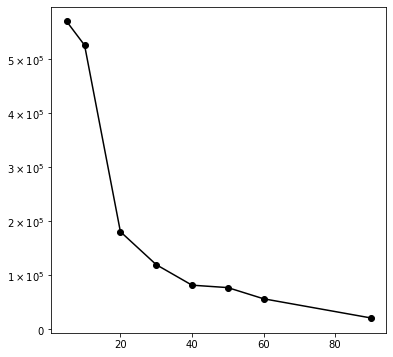

In [91]:
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(df_750C_small.iloc[1:, 0][::-1], [5.7e5, 5.26e5, 1.81e5, 1.2e5, 0.82e5, 0.775e5, 0.568e5, 0.213e5][::-1], marker = 'o', color = 'k')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

In [64]:
np.log10(df_750C_small.iloc[:, -1].to_numpy()[2])

5.721428482262527

In [ ]:
def spectras(path, files):
    
    dfs = []
    
    for file in files:
        
        df = pd.read_csv(path + '\\' + file, sep = '\t', engine = 'python', header = None)
        df[1] = df[1]/max(df[1])
        dfs.append(df)
    
    df = np.zeros((dfs[0].shape))
    
    for item in dfs:
        
        df += item
        
    df /= len(dfs)
        
    return df

In [ ]:
path = r'C:\Users\kpebe\OneDrive\Рабочий стол\Regimes_1_5_5lpm_3lpm'

files = ['pristine_regime1_0.125cat_0.03CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_1.txt',
         'pristine_regime1_0.125cat_0.03CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_2.txt',
         'pristine_regime1_0.125cat_0.03CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_3.txt',
         'pristine_regime1_0.125cat_0.03CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_4.txt',
         'pristine_regime1_0.125cat_0.03CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_5.txt',
         'pristine_regime2_0.125cat_0.025CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_1.txt',
         'pristine_regime2_0.125cat_0.025CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_2.txt',
         'pristine_regime2_0.125cat_0.025CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_3.txt',
         'pristine_regime2_0.125cat_0.025CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_4.txt',
         'pristine_regime2_0.125cat_0.025CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_5.txt',
         'pristine_regime3_0.125cat_0.035CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_1.txt',
         'pristine_regime3_0.125cat_0.035CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_2.txt',
         'pristine_regime3_0.125cat_0.035CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_3.txt',
         'pristine_regime3_0.125cat_0.035CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_4.txt',
         'pristine_regime3_0.125cat_0.035CO2_5lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_5.txt',
         'pristine_regime4_0.15cat_0.02CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_1.txt',
         'pristine_regime4_0.15cat_0.02CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_2.txt',
         'pristine_regime4_0.15cat_0.02CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_3.txt',
         'pristine_regime4_0.15cat_0.02CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_4.txt',
         'pristine_regime4_0.15cat_0.02CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_5.txt',
         'pristine_regime5_0.15cat_0.03CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_1.txt',
         'pristine_regime5_0.15cat_0.03CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_2.txt',
         'pristine_regime5_0.15cat_0.03CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_3.txt',
         'pristine_regime5_0.15cat_0.03CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_4.txt',
         'pristine_regime5_0.15cat_0.03CO2_3lminmainflow_ferrocene_laser532_0.1mW_exposure10Hz_slit50cp_5.txt']

dfs = []
dfs.append(spectras(path, files[:5]))
dfs.append(spectras(path, files[5:10]))
dfs.append(spectras(path, files[10:15]))
dfs.append(spectras(path, files[15:20]))
dfs.append(spectras(path, files[20:25]))

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
i = 0

regimes = ['5lpm_0.125cat_0.03CO2', '5lpm_0.125cat_0.025CO2', '5lpm_0.125cat_0.035CO2', '3lpm_0.15cat_0.02CO2', '3lpm_0.15cat_0.03CO2']

for df in dfs:
    
    ax.plot(df.iloc[:, 0], df.iloc[:, 1], label = regimes[i], alpha = 0.6)
#     ax[1].plot(df.iloc[1250:1450, 0], df.iloc[1250:1450, 1], label = regimes[i])
    i += 1
    
#     ax[0].legend(fontsize = 14)
    ax.legend(fontsize = 18
             )
    
#     ax[0].tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
#     ax[0].set_ylabel('$Intensity$', fontsize = 14)
    ax.set_ylabel('$Intensity$', fontsize = 16)
    
    ax.set_xlabel('$Raman$ $shift,$ $cm^{-1}$', fontsize = 16)

plt.savefig('Raman 1-2 regimes.png', format = 'png', dpi = 600, bbox_inches = 'tight')

In [ ]:
i = 1
for df in dfs:
    
    plt.plot(df.iloc[530:730, 0], df.iloc[530:730, 1], label = 'Regime {}'.format(i))
    i += 1
    
plt.legend()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
i = 0

regimes = ['5lpm_0.03CO2', '5lpm_0.025CO2', '5lpm_0.035CO2', '3lpm_0.02CO2', '3lpm_0.03CO2']

for df in dfs:
    
    ax[0].plot(df.iloc[0:180, 0], df.iloc[0:180, 1], label = regimes[i])
    ax[1].plot(df.iloc[750:850, 0], df.iloc[750:850, 1], label = regimes[i])
    ax[2].plot(df.iloc[1250:1450, 0], df.iloc[1250:1450, 1], label = regimes[i])
    i += 1
    
    ax[0].legend(fontsize = 12)
#     ax[1].legend(fontsize = 12)
#     ax[2].legend(fontsize = 12)
    
    ax[0].tick_params(axis='both', which='major', labelsize=12)
    ax[1].tick_params(axis='both', which='major', labelsize=12)
    ax[2].tick_params(axis='both', which='major', labelsize=12)
    
    ax[0].set_ylabel('$Intensity$', fontsize = 14)
    
    ax[0].set_xlabel('$Raman$ $shift,$ $cm^{-1}$', fontsize = 14)
    ax[1].set_xlabel('$Raman$ $shift,$ $cm^{-1}$', fontsize = 14)
    ax[2].set_xlabel('$Raman$ $shift,$ $cm^{-1}$', fontsize = 14)

plt.savefig('Raman 1-2 regimes.png', format = 'png', dpi = 600, bbox_inches = 'tight')

In [ ]:
ax.shape

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (12, 6))
for df in dfs:

    ax[0] = plt.plot(df.iloc[1250:1450, 0], df.iloc[1250:1450, 1], label = 'Regime {}'.format(i))
    i += 1
    
plt.legend()
    

In [ ]:
path = r'C:\Users\kpebe\OneDrive\Рабочий стол\New regimes'
file1 = 'Regime 1.Sample.Raw.csv'
file2 = 'Regime 2.Sample.Raw.csv'
# os.makedirs(path + '\Calc', exist_ok = True)
regimes = [0, 0.025, 0.03, 0.035, 0.04]
dfs = []
j = 0
fig, ax = plt.subplots(figsize = (8,5))

for i in range(5):
    
    df = pd.read_csv(r'C:\Users\kpebe\OneDrive\Рабочий стол\New regimes\Regime {}.csv'.format(i+1),
                 engine = 'python', sep = ';')
    dfs.append(df)

for df in dfs:
    
    try:
        df.columns = ['nm', 'A']

        df.query('nm >= 280 & nm <= 2500', inplace = True)
        pd.DataFrame.reset_index(df, drop = True, inplace = True)

#         q = df['A'].iloc[0]
#         df.query("A >= @q", inplace = True)

        pd.DataFrame.reset_index(df, drop = True, inplace = True)
        df.columns = ['Wavelength,nm', 'A,a.u.']

        diff_1800 = df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 1800].tolist()[0]] - df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 1802].tolist()[0]]

        for i in range (0, df.index[df['Wavelength,nm'] == 1800].tolist()[0]):

            df['A,a.u.'].iloc[i] += diff_1800

        diff_860 = df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 860].tolist()[0]] - df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 862].tolist()[0]]

        for i in range (0, df.index[df['Wavelength,nm'] == 860].tolist()[0]):

            df['A,a.u.'].iloc[i] += diff_860

        plt.plot(df['Wavelength,nm'], savgol_filter(df['A,a.u.']/np.amax(df['A,a.u.']), window_length = 25, polyorder = 2), label = '${}$'.format(regimes[j]) + ' ' + '$CO_{2}$')
        j += 1
    
    except:
        
        print(j)

plt.xlabel('\u03BB, nm')
plt.ylabel('Normalized A')
plt.legend()
fig.tight_layout(pad = 1)

fig.savefig(path + '\\Uvvis.png',
             format = 'png', dpi = 300)
plt.clf()
plt.close(fig)

In [ ]:
samples = np.arange(5, 51, 4)
poly = np.arange(1, 5, 1)

os.makedirs('Savgol test', exist_ok = True)

for n in samples:
    
    for magn in poly:
        
        fig,ax = plt.subplots(figsize = (6,6))
        
        data = savgol_filter(df['A,a.u.'], window_length = n, polyorder = magn)
        
        df_exp = df.copy()
        df_exp['A,a.u.'] = data
        
        plt.plot(df['Wavelength,nm'], data, label = '{} window, {} poly'.format(n, magn))
        
        plt.xlabel('\u03BB, nm')
        plt.ylabel('A,a.u.')
        plt.legend()
        fig.tight_layout(pad = 1)

        fig.savefig(path + '\Calc' + '\{} window, {} poly.png'.format(n, magn),
                     format = 'png', dpi = 150)
        plt.clf()
        plt.close(fig)
    
        pd.DataFrame.to_csv(df_exp, path_or_buf = path + '\Calc'
                        + '\{} window, {} poly.csv'.format(n, magn), sep = '\t', header = True, index = False)

In [ ]:
arr = np.array([[1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10]]).T

In [ ]:
np.sum(arr, axis = 1)

In [ ]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.plot((3 * 10 ** 8 * 6.64 / 10 ** 34/(dfs[0]['Wavelength,nm'] /10 ** 9)) / (1.6 / 10 ** 19), savgol_filter(dfs[0]['A,a.u.']/max(dfs[0]['A,a.u.']), 13, 1), label = '12 $\mu$$m$')
plt.plot((3 * 10 ** 8 * 6.64 / 10 ** 34/(dfs[1]['Wavelength,nm'] /10 ** 9)) / (1.6 / 10 ** 19), savgol_filter(dfs[1]['A,a.u.']/max(dfs[1]['A,a.u.']), 13, 1), label = '6 $\mu$$m$')
plt.xlabel('Wavelength, nm', fontsize = 14)
plt.ylabel('Normalized absorbance', fontsize = 14)
plt.tick_params(labelsize = 12)
plt.legend(fontsize = 14)

plt.savefig('uvvis.png', format = 'png', dpi = 600, bbox_inches = 'tight')

In [ ]:
arr

In [ ]:
df

In [ ]:
motherlode